In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<h4 style = "color : orange"> From above it seems that columns Alley, FireplaceQu, PoolQC, Fence, MiscFeature is having null values which is greater that 70% of total records that is 1022. So Let's drop this columns</h4>

In [8]:
df.drop(columns=['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature', 'LotFrontage'], axis=1, inplace=True)

In [9]:
df.shape

(1460, 74)

In [10]:
df[df.duplicated()]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<h4 style = "color : orange">There are no duplicate rows in the dataset</h4>

In [11]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

<h4 style = "color : orange">From above information it seems that most of the values for Utilities are only AllPub, so it doesn't make any sense with single value. So Let's drop that column</h4>

In [12]:
df.drop(columns=['Utilities'], axis=1, inplace=True)

In [13]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

<h4 style = "color : orange">As per data dictionary we found that NA value for GarageType, GarageFinish, GarageQual and GarageCond is defined as "No Garage". Let's impute this columns with No Garage value</h4>

In [14]:
garage_columns = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for column in garage_columns:
    df[column].fillna("No Garage", inplace=True)

In [15]:
df[df.columns[df.isnull().sum() > 0]].isnull().sum()

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageYrBlt     81
dtype: int64

<h4 style = "color : orange">Also per data dictionary we found that NA value for BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 is defined as "No Basement". Let's impute this columns with No Basement value</h4>

In [16]:
basement_columns = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for column in basement_columns:
    df[column].fillna("No Basement", inplace=True)

In [17]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()

MasVnrType      8
MasVnrArea      8
Electrical      1
GarageYrBlt    81
dtype: int64

<h4 style = "color : orange">Let's impute missing values of remaining numeric columns by median and categorical columns by mode</h4>

In [18]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

In [19]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

<h3 style = "color : Magenta">Univariate Analysis</h3>

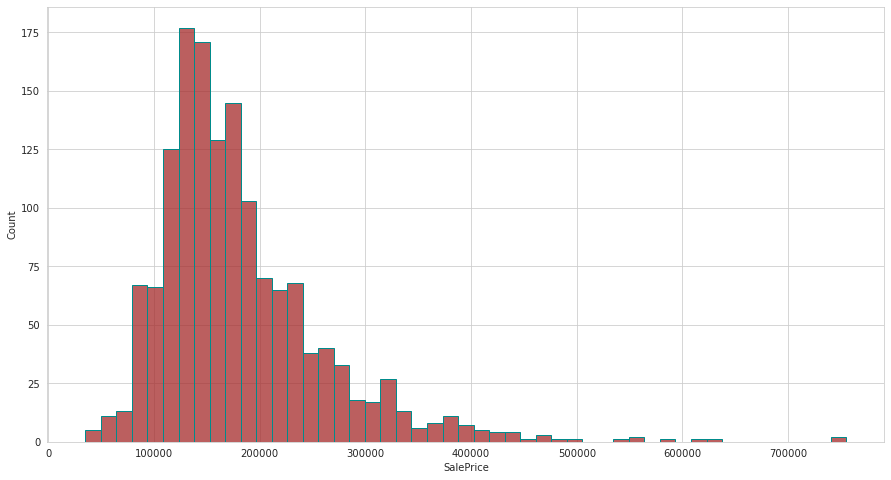

In [86]:
plt.figure(figsize=(15, 8))
sns.histplot(df["SalePrice"], color="brown", edgecolor="darkcyan")
plt.show()

In [22]:
df.shape

(1460, 73)

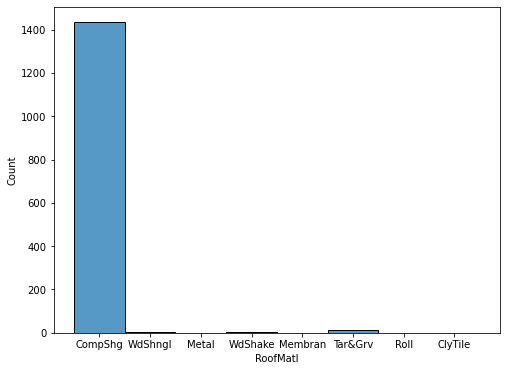

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df["RoofMatl"])
plt.show()

In [25]:
df["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

<h4 style = "color : orange">From above plot it seems that column is left skewed with almost single value that is Standard (Composite) Shingle, Hence column doesn't add any sense with single value so let's drop that column</h4>

In [26]:
df.drop(columns=["RoofMatl"], inplace=True)

In [27]:
df.shape

(1460, 72)

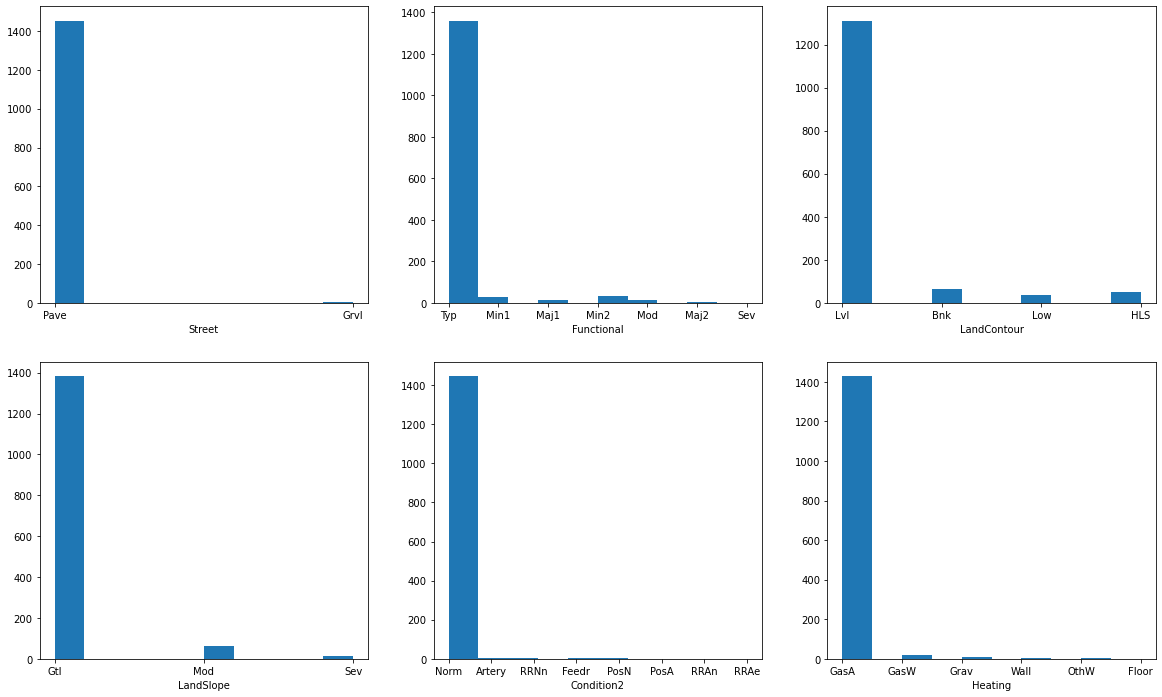

In [28]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
plt.hist(x = "Street", data = df)
plt.xlabel("Street")
plt.subplot(2, 3, 2)
plt.hist(x = "Functional", data = df)
plt.xlabel("Functional")
plt.subplot(2, 3, 3)
plt.hist(x = "LandContour", data = df)
plt.xlabel("LandContour")
plt.subplot(2, 3, 4)
plt.hist(x = "LandSlope", data = df)
plt.xlabel("LandSlope")
plt.subplot(2, 3, 5)
plt.hist(x = "Condition2", data = df)
plt.xlabel("Condition2")
plt.subplot(2, 3, 6)
plt.hist(x = "Heating", data = df)
plt.xlabel("Heating")
plt.show()

<h4 style = "color : orange">From above subplot we found that all above columns are left skewed with almost single value, Hence column doesn't add any sense with single value so let's drop those columns.</h4>

In [29]:
df.drop(columns=["Street", "Functional", "LandContour", "LandSlope", "Condition2", "Heating"], inplace=True)

In [30]:
df.shape

(1460, 66)

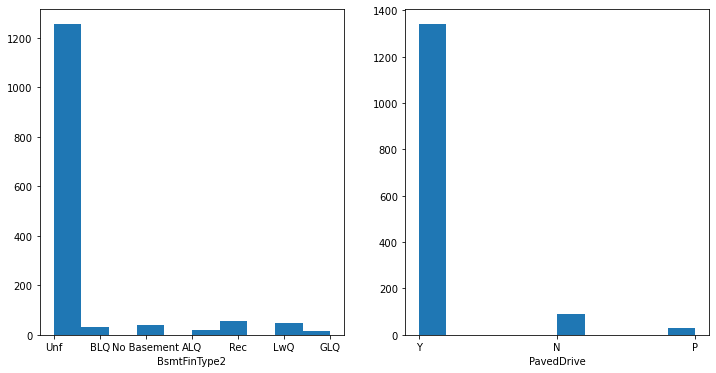

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(x = "BsmtFinType2", data = df)
plt.xlabel("BsmtFinType2")
plt.subplot(1, 2, 2)
plt.hist(x = "PavedDrive", data = df)
plt.xlabel("PavedDrive")
plt.show()

In [32]:
# Let's drop few more columns because of skewness
df.drop(columns=["BsmtFinType2", "PavedDrive", "LowQualFinSF"], inplace=True)

In [33]:
df.shape

(1460, 63)

In [34]:
# No need of features which are categorical in nature but defined as numerical in dataset
df.drop(columns=["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"], inplace=True)

In [35]:
df.shape

(1460, 59)

In [36]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

<h4 style = "color : orange">Data dictionary shows that there are some ordinal category columns so let's assign map to them instead of creating dummy columns.</h4>

In [37]:
mapping = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
df["ExterQual"] = df["ExterQual"].map(mapping)
df["ExterCond"] = df["ExterCond"].map(mapping)
df["HeatingQC"] = df["HeatingQC"].map(mapping)
df["KitchenQual"] = df["KitchenQual"].map(mapping)
basement_mapping = {"No Basement": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df["BsmtQual"] = df["BsmtQual"].map(basement_mapping)
df["BsmtCond"] = df["BsmtCond"].map(basement_mapping)
garage_mapping = {"No Garage": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df["GarageQual"] = df["GarageQual"].map(garage_mapping)
df["GarageCond"] = df["GarageCond"].map(garage_mapping)
basement_finish_rating = {"No Basement": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
df["BsmtFinType1"] = df["BsmtFinType1"].map(basement_finish_rating)

<h3 style = "color : Magenta">Bivariate Analysis</h3>

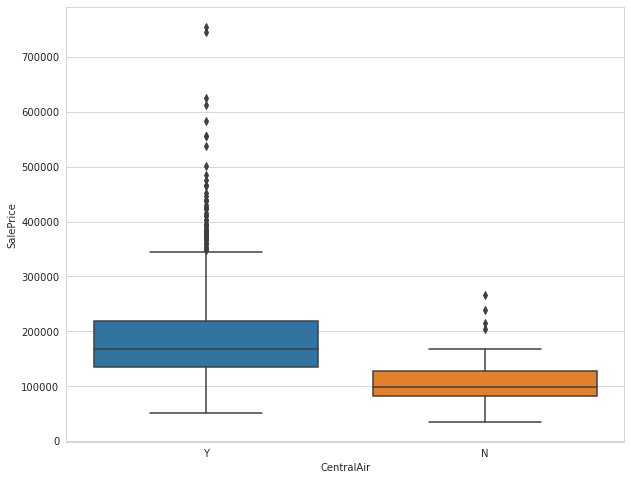

In [88]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="CentralAir", y="SalePrice", data=df)
plt.show()

<h4 style = "color : orange">Above plot shows that Air conditioning houses having greater price than non AC houses</h4>

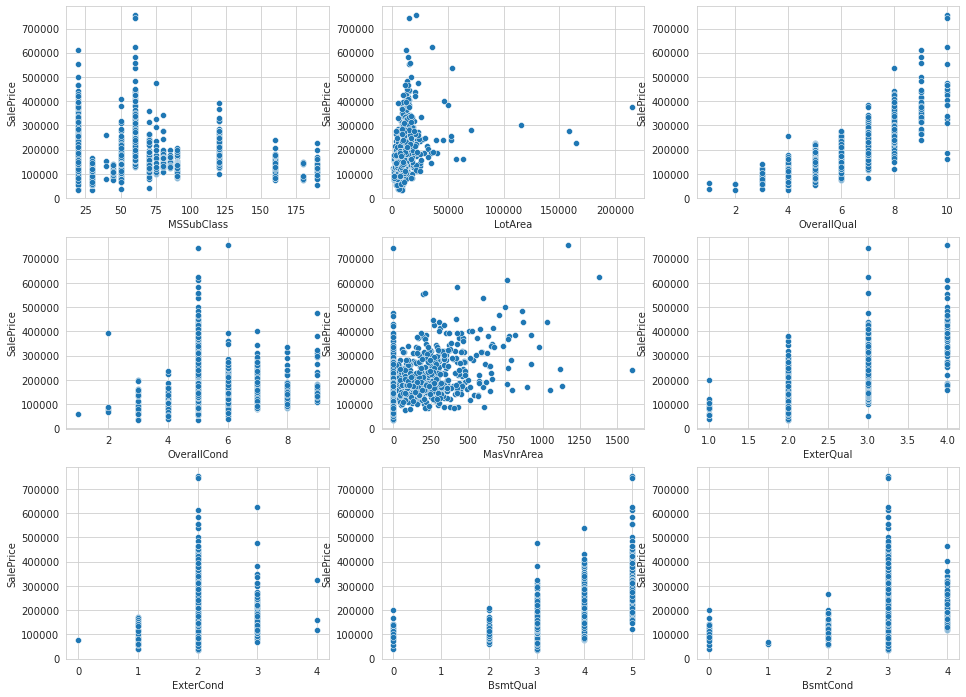

In [38]:
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
plt.subplot(3, 3, 1)
sns.scatterplot(x= "MSSubClass", y= "SalePrice", data=df)
plt.subplot(3, 3, 2)
sns.scatterplot(x= "LotArea", y="SalePrice", data=df)
plt.subplot(3, 3, 3)
sns.scatterplot(x= "OverallQual", y= "SalePrice", data=df)
plt.subplot(3, 3, 4)
sns.scatterplot(x= "OverallCond", y= "SalePrice", data=df)
plt.subplot(3, 3, 5)
sns.scatterplot(x= "MasVnrArea", y= "SalePrice", data= df)
plt.subplot(3, 3, 6)
sns.scatterplot(x= "ExterQual", y= "SalePrice", data= df)
plt.subplot(3, 3, 7)
sns.scatterplot(x= "ExterCond", y= "SalePrice", data= df)
plt.subplot(3, 3, 8)
sns.scatterplot(x= "BsmtQual", y= "SalePrice", data= df)
plt.subplot(3, 3, 9)
sns.scatterplot(x= "BsmtCond", y= "SalePrice", data= df)
plt.show()

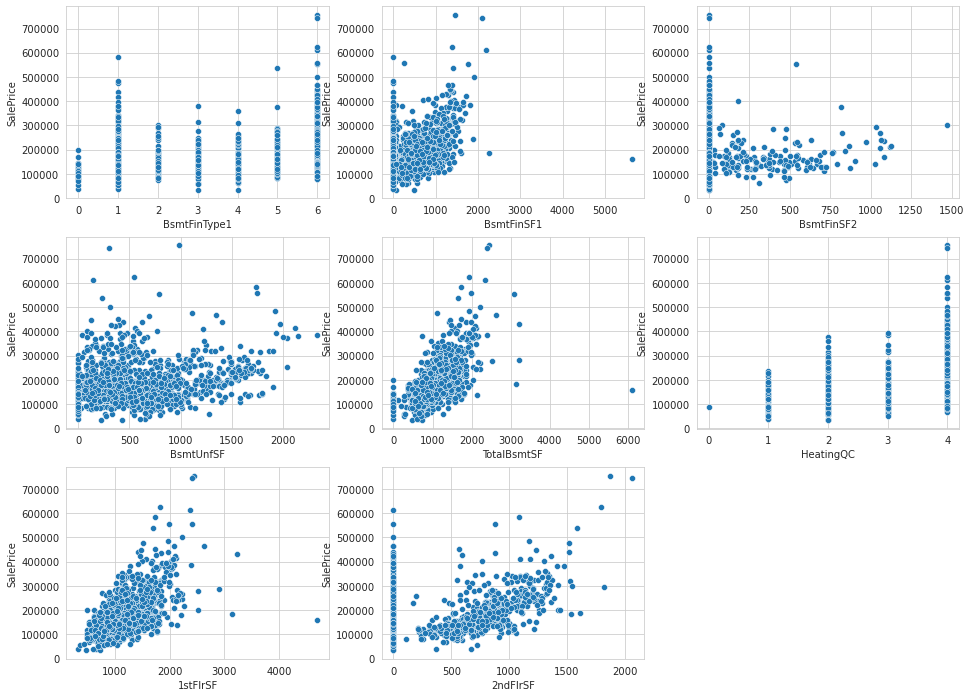

In [39]:
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
plt.subplot(3, 3, 1)
sns.scatterplot(x= "BsmtFinType1", y= "SalePrice", data=df)
plt.subplot(3, 3, 2)
sns.scatterplot(x= "BsmtFinSF1", y="SalePrice", data=df)
plt.subplot(3, 3, 3)
sns.scatterplot(x= "BsmtFinSF2", y= "SalePrice", data=df)
plt.subplot(3, 3, 4)
sns.scatterplot(x= "BsmtUnfSF", y= "SalePrice", data=df)
plt.subplot(3, 3, 5)
sns.scatterplot(x= "TotalBsmtSF", y= "SalePrice", data= df)
plt.subplot(3, 3, 6)
sns.scatterplot(x= "HeatingQC", y= "SalePrice", data= df)
plt.subplot(3, 3, 7)
sns.scatterplot(x= "1stFlrSF", y= "SalePrice", data= df)
plt.subplot(3, 3, 8)
sns.scatterplot(x= "2ndFlrSF", y= "SalePrice", data= df)
#plt.subplot(3, 3, 9)
#sns.scatterplot(x= "LowQualFinSF", y= "SalePrice", data= df)
plt.show()

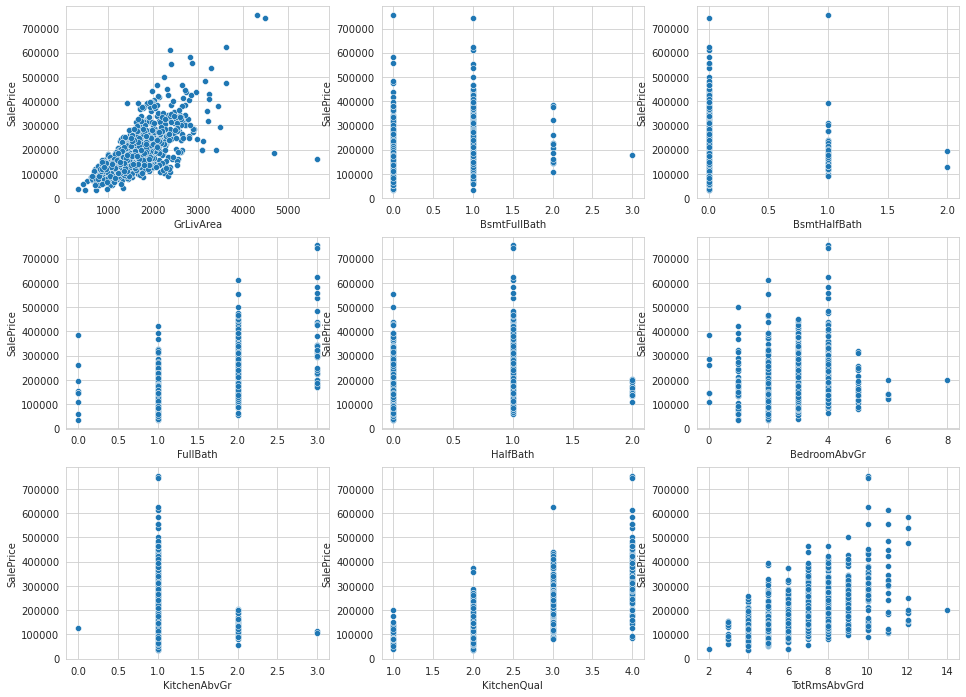

In [40]:
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
plt.subplot(3, 3, 1)
sns.scatterplot(x= "GrLivArea", y= "SalePrice", data=df)
plt.subplot(3, 3, 2)
sns.scatterplot(x= "BsmtFullBath", y="SalePrice", data=df)
plt.subplot(3, 3, 3)
sns.scatterplot(x= "BsmtHalfBath", y= "SalePrice", data=df)
plt.subplot(3, 3, 4)
sns.scatterplot(x= "FullBath", y= "SalePrice", data=df)
plt.subplot(3, 3, 5)
sns.scatterplot(x= "HalfBath", y= "SalePrice", data= df)
plt.subplot(3, 3, 6)
sns.scatterplot(x= "BedroomAbvGr", y= "SalePrice", data= df)
plt.subplot(3, 3, 7)
sns.scatterplot(x= "KitchenAbvGr", y= "SalePrice", data= df)
plt.subplot(3, 3, 8)
sns.scatterplot(x= "KitchenQual", y= "SalePrice", data= df)
plt.subplot(3, 3, 9)
sns.scatterplot(x= "TotRmsAbvGrd", y= "SalePrice", data= df)
plt.show()

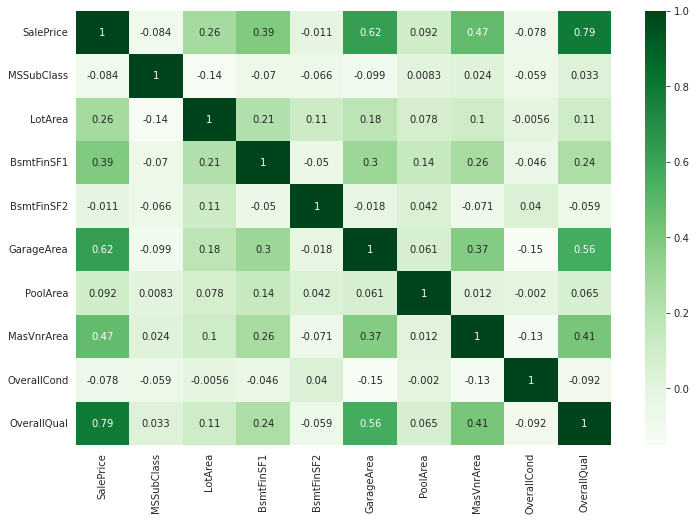

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[["SalePrice", "MSSubClass", "LotArea", "BsmtFinSF1","BsmtFinSF2", "GarageArea", "PoolArea", "MasVnrArea", "OverallCond", "OverallQual"]].corr(), annot=True, cmap="Greens")
plt.show()

In [42]:
housing_num_df = df.select_dtypes(include=['float64','int64'])
housing_num_df.shape

(1460, 40)

In [43]:
housing_cat_df = df.select_dtypes(exclude=['float64', 'int64'])
housing_cat_df.shape

(1460, 19)

In [44]:
housing_dummy_df = pd.get_dummies(housing_cat_df, drop_first= True)
housing_dummy_df.shape

(1460, 127)

In [45]:
housing_dummy_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
housing_df = pd.concat([housing_num_df,housing_dummy_df], axis = 1)
housing_df.shape

(1460, 167)

In [47]:
housing_train_df, housing_test_df = train_test_split(housing_df, train_size = 0.70, random_state= 100)
print(housing_train_df.shape)
print(housing_test_df.shape)

(1021, 167)
(439, 167)


In [48]:
num_columns = housing_num_df.columns

In [49]:
scaler = MinMaxScaler()
housing_train_df[num_columns] = scaler.fit_transform(housing_train_df[num_columns])

In [50]:
housing_train_df[num_columns].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,...,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.226306,0.042162,0.565894,0.572600,0.065306,0.466536,0.363696,0.695984,0.732125,0.598923,...,0.561019,0.108100,0.089934,0.042105,0.007756,0.037559,0.003318,0.003143,0.480812,0.202346
std,0.254701,0.048221,0.155515,0.136515,0.117088,0.190447,0.116470,0.180070,0.144291,0.352486,...,0.144197,0.145250,0.126569,0.114434,0.063649,0.136582,0.053278,0.037314,0.249871,0.109845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.027937,0.444444,0.500000,0.000000,0.333333,0.333333,0.600000,0.750000,0.166667,...,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.131371
50%,0.176471,0.037555,0.555556,0.500000,0.000000,0.333333,0.333333,0.800000,0.750000,0.666667,...,0.600000,0.000000,0.049713,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.175115
75%,0.294118,0.046943,0.666667,0.625000,0.098750,0.666667,0.333333,0.800000,0.750000,1.000000,...,0.600000,0.196033,0.133843,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.250104
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
y_train = housing_train_df.pop("SalePrice")
X_train = housing_train_df

In [52]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select= 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [53]:
support_column = X_train.columns[rfe.support_]
X_train_rfe = X_train[support_column]
X_train_rfe = sm.add_constant(X_train_rfe)
ln_model = sm.OLS(y_train, X_train_rfe).fit()   
print(ln_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     314.8
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:09:54   Log-Likelihood:                 1695.2
No. Observations:                1021   AIC:                            -3358.
Df Residuals:                    1005   BIC:                            -3280.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

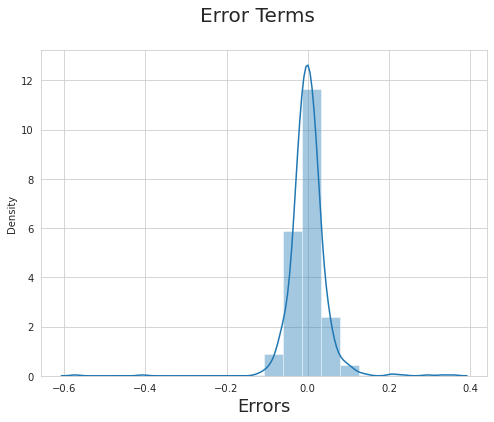

In [54]:
# Plot the distribution plot for the error terms
fig = plt.figure(figsize=(8, 6))
y_train_pred = ln_model.predict(X_train_rfe)
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)
plt.show()

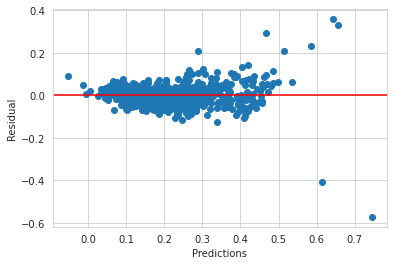

In [87]:
residuals = y_train - y_train_pred
plt.scatter( y_train_pred , residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [56]:
RSS = np.sum(np.square(y_train - y_train_pred))
print(RSS)
MSE = mean_squared_error(y_train, y_train_pred)
print(MSE)
RMSE = MSE**0.5
print(RMSE)

2.1595547773298365
0.0021151369023798593
0.04599061754727653


In [57]:
housing_test_df[num_columns] = scaler.transform(housing_test_df[num_columns])
housing_test_df[num_columns].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,...,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,439.000000,439.000000,439.000000,439.00000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.195498,0.042580,0.568211,0.57033,0.062453,0.462415,0.355353,0.702050,0.737472,0.572513,...,0.563554,0.114320,0.087549,0.034346,0.004282,0.046575,0.006444,0.002022,0.490785,0.203785
std,0.233458,0.042978,0.149440,0.14508,0.102809,0.193874,0.118210,0.163775,0.122345,0.348212,...,0.143480,0.148636,0.127082,0.101487,0.040640,0.174747,0.078665,0.013016,0.236138,0.111541
min,0.000000,-0.000828,0.000000,0.12500,0.000000,0.000000,-0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004166
25%,0.000000,0.029293,0.444444,0.50000,0.000000,0.333333,0.333333,0.600000,0.750000,0.166667,...,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.134842
50%,0.176471,0.036947,0.555556,0.50000,0.000000,0.333333,0.333333,0.800000,0.750000,0.666667,...,0.600000,0.000000,0.045889,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.180669
75%,0.235294,0.047823,0.666667,0.62500,0.108750,0.666667,0.333333,0.800000,0.750000,1.000000,...,0.600000,0.210035,0.125239,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.247431
max,1.000000,0.736888,1.000000,1.00000,0.575625,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.849475,1.045889,0.576087,0.482283,1.283422,1.138889,0.161290,1.000000,0.800940


In [58]:
X_train_rfe.columns

Index(['const', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtQual', 'BsmtFinSF1', 'GrLivArea', 'KitchenQual', 'GarageCars',
       'GarageCond', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'BsmtExposure_No Basement', 'SaleType_Con'],
      dtype='object')

In [59]:
y_test = housing_test_df.pop('SalePrice')
X_test = housing_test_df[['LotArea', 'OverallQual', 'OverallCond', 'ExterQual',
       'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr',
       'GarageCars', 'Foundation_Wood', 'BsmtExposure_No Basement',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_Oth']]

In [60]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = ln_model.predict(X_test_sm)

In [61]:
X_test_sm.shape

(439, 16)

In [62]:
#Evaluate the r2 score for test set
round(r2_score(y_true=y_test, y_pred=y_test_pred), 2)

0.54

<h4 style = "color : orange">Above score clearly shows that it is falling under overfitting because r-square for testing and training dataset is having big difference around 29%</h4>

<h3 style = "color : Magenta">Ridge Regression</h3>

In [63]:
scaler = MinMaxScaler()
housing_df[num_columns] = scaler.fit_transform(housing_df[num_columns])
housing_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.033420,0.666667,0.500,0.12250,0.666667,0.5,0.8,0.75,1.000000,...,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.038795,0.555556,0.875,0.00000,0.333333,0.5,0.8,0.75,0.833333,...,0,0,0,0,1,0,0,0,1,0
2,0.235294,0.046507,0.666667,0.500,0.10125,0.666667,0.5,0.8,0.75,1.000000,...,0,0,0,0,1,0,0,0,1,0
3,0.294118,0.038561,0.666667,0.500,0.00000,0.333333,0.5,0.6,1.00,0.833333,...,0,0,0,0,1,0,0,0,0,0
4,0.235294,0.060576,0.777778,0.500,0.21875,0.666667,0.5,0.8,0.75,1.000000,...,0,0,0,0,1,0,0,0,1,0


In [64]:
housing_train_df, housing_test_df = train_test_split(housing_df, train_size = 0.70, random_state= 100)
print(housing_train_df.shape)
print(housing_test_df.shape)

(1021, 167)
(439, 167)


In [65]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 10, 100, 500,1000]}
y_train = housing_train_df.pop("SalePrice")
X_test = housing_train_df

In [66]:
ridge = Ridge()
grid_search_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring="r2", verbose=True)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 10, 100, 500,
                                   1000]},
             scoring='r2', verbose=True)

lasso = Ridge()
grid_search_cv = GridSearchCV(estimator=lasso, param_grid=params, scoring="r2", cv=5)
grid_search_cv.fit(X_train, y_train)

In [67]:
grid_search_cv.best_params_

{'alpha': 10}

In [68]:
y_test = housing_test_df.pop("SalePrice")
X_test = housing_test_df

In [69]:
ridge = Ridge(alpha=grid_search_cv.best_params_["alpha"])
ridge.fit(X_train, y_train)
y_pred_ridge_train = ridge.predict(X_train)
print("Train R Square for Ridge Regression :", round(r2_score(y_train, y_pred_ridge_train), 2))
y_pred_ridge_test = ridge.predict(X_test)
print("Test R Square for Ridge Regression :", round(r2_score(y_test, y_pred_ridge_test), 2))

Train R Square for Ridge Regression : 0.86
Test R Square for Ridge Regression : 0.86


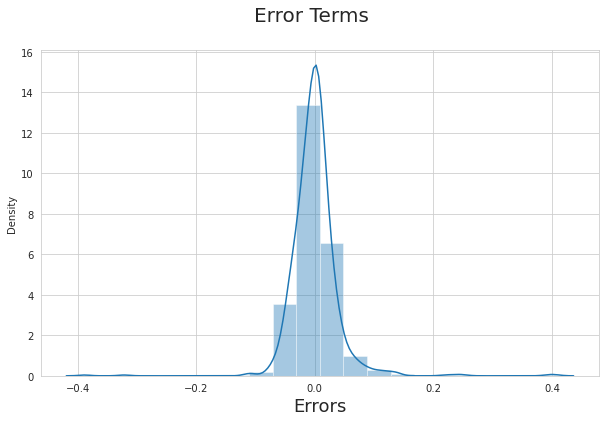

In [70]:
# Plot the distribution plot for the error terms
fig = plt.figure(figsize=(10, 6))
sns.distplot((y_train - y_pred_ridge_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)    
plt.xlabel('Errors', fontsize = 18)
plt.show()

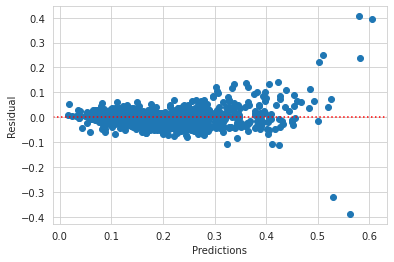

In [71]:
residuals = y_train - y_pred_ridge_train
plt.scatter( y_pred_ridge_train , residuals)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

<h3 style = "color : Magenta">Lasso Regression</h3>

In [72]:
params = {'alpha' : [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.9]}
lasso = Lasso()
grid_search_cv = GridSearchCV(estimator=lasso, param_grid=params, scoring="r2", verbose=True)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1,
                                   0.9]},
             scoring='r2', verbose=True)

In [73]:
lasso = Lasso(alpha=grid_search_cv.best_params_["alpha"])
lasso.fit(X_train, y_train)
y_pred_lasso_train = lasso.predict(X_train)
print("Train R Square for Lasso Regression:", round(r2_score(y_train, y_pred_lasso_train), 2))
y_pred_lasso_test = lasso.predict(X_test)
print("Test R Square for Lasso Regression:", round(r2_score(y_test, y_pred_lasso_test), 2))

Train R Square for Lasso Regression: 0.87
Test R Square for Lasso Regression: 0.86


In [74]:
grid_search_cv.best_params_

{'alpha': 0.0001}

In [75]:
lasso_params = []
lasso_params.append(lasso.intercept_)
lasso_params.extend(list(sorted(lasso.coef_)))
lasso_params = [round(x, 2) for x in lasso_params]
lasso_columns = X_train.columns
lasso_columns = lasso_columns.insert(0, "constant")
list((zip(lasso_columns, lasso_params)))

[('constant', -0.11),
 ('MSSubClass', -0.03),
 ('LotArea', -0.02),
 ('OverallQual', -0.02),
 ('OverallCond', -0.02),
 ('MasVnrArea', -0.02),
 ('ExterQual', -0.02),
 ('ExterCond', -0.01),
 ('BsmtQual', -0.01),
 ('BsmtCond', -0.01),
 ('BsmtFinType1', -0.01),
 ('BsmtFinSF1', -0.01),
 ('BsmtFinSF2', -0.01),
 ('BsmtUnfSF', -0.01),
 ('TotalBsmtSF', -0.01),
 ('HeatingQC', -0.01),
 ('1stFlrSF', -0.01),
 ('2ndFlrSF', -0.01),
 ('GrLivArea', -0.01),
 ('BsmtFullBath', -0.01),
 ('BsmtHalfBath', -0.01),
 ('FullBath', -0.01),
 ('HalfBath', -0.01),
 ('BedroomAbvGr', -0.01),
 ('KitchenAbvGr', -0.01),
 ('KitchenQual', -0.01),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', -0.0),
 ('GarageCars', -0.0),
 ('GarageArea', -0.0),
 ('GarageQual', -0.0),
 ('GarageCond', -0.0),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0)

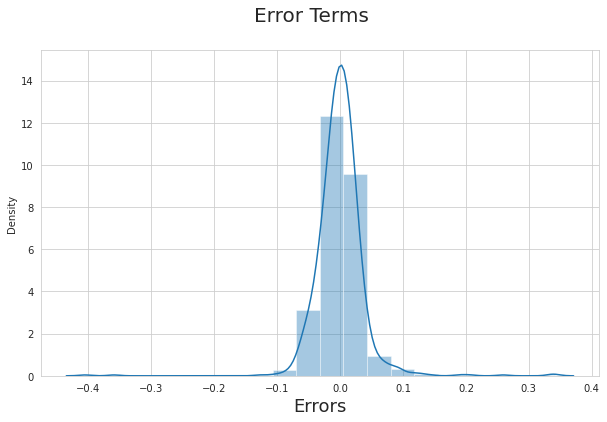

In [85]:
# Plot the distribution plot for the error terms
fig = plt.figure(figsize=(10, 6))
sns.distplot((y_train - y_pred_lasso_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

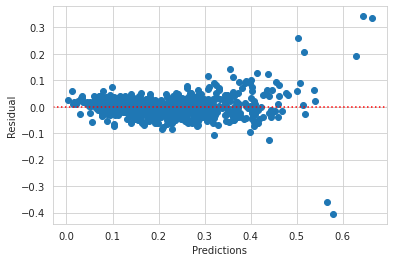

In [77]:
residuals = y_train - y_pred_lasso_train
plt.scatter( y_pred_lasso_train , residuals)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

Text(0, 0.5, 'y test pred')

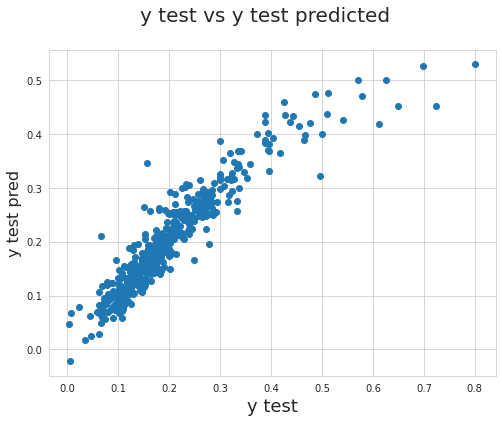

In [90]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso_test)
fig.suptitle('y test vs y test predicted', fontsize = 20)
plt.xlabel('y test', fontsize = 18)
plt.ylabel('y test pred', fontsize = 16)  